In [102]:
import numpy as np
import pandas as pd
import networkx as nx


In [213]:
# Notebook configuration and utility functions:
from IPython.display import display

pd.options.display.max_rows = 100

In [2]:
# Download data:
# Requires kaggle login
# Download manually from https://www.kaggle.com/carrie1/ecommerce-data

# Download with Kaggle API and python package
# Auth in environment vars:
#   export KAGGLE_USERNAME=datadinosaur
#   export KAGGLE_KEY=xxxxxxxxxxxxxx
# Auth in kaggle.json file: 
# Download kaggle.json from account page on kaggle.com and place in ~/.kaggle/kaggle.json
# pip install kaggle

# import kaggle
# kaggle.api.authenticate()
# kaggle.api.dataset_download_files(
#     'The_name_of_the_dataset', 
#     path='data/raw', 
#     unzip=True
# )

ModuleNotFoundError: No module named 'kaggle'

In [176]:
# Load data
# df = df_raw = pd.read_csv("../data/raw/data.csv")
df = df_raw = pd.read_csv("../data/raw/data.csv", keep_default_na=False)  # Giver mere kontrol over tomme strings.
print(f"Table rows:", len(df))
df.head()

Table rows: 541909


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [177]:
# Remove bad data:
df = df_raw
print("Rows before QA filtering:", len(df))

# Remove lines with N/A values:
for column in df.columns:
    print(f" - NaN {column}:", df[column].isna().sum()) 
df = df_dropna = df.dropna()
print("Rows after dropping N/A:", len(df))

print("Columns with empty values:")
for column in df.columns:
    print(f" - {column} empty values:", (df[column] == '').sum()) 
    df = df[~(df[column] == '')]
print("Rows after dropping rows with empty values:", len(df))
    
# Remove lines that does not represent an actual product:
print("Non-product stock codes:")
non_product_stock_codes = ['BANK CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M', 'PADS', 'POST']
for code in non_product_stock_codes:
    print(f" - {code} lines:", (df['StockCode'] == code).sum()) 
df = df[~df['StockCode'].isin(['BANK CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M', 'PADS', 'POST'])]
print("Rows after dropping non-product lines:", len(df))

# # print(f" - Number of POSTAGE lines:", len(df['StockCode'] == "POST"))
# print(f" - No. of POSTAGE lines:", (df['StockCode'] == "POST").sum())
# df = df[df['StockCode'] != "POST"]
# print("Rows after removing POST:", len(df))

print("Rows after QA filtering:", len(df))

df.head()

Rows before QA filtering: 541909
 - NaN InvoiceNo: 0
 - NaN StockCode: 0
 - NaN Description: 0
 - NaN Quantity: 0
 - NaN InvoiceDate: 0
 - NaN UnitPrice: 0
 - NaN CustomerID: 0
 - NaN Country: 0
Rows after dropping N/A: 541909
Columns with empty values:
 - InvoiceNo empty values: 0
 - StockCode empty values: 0
 - Description empty values: 1454
 - Quantity empty values: 0
 - InvoiceDate empty values: 0
 - UnitPrice empty values: 0
 - CustomerID empty values: 133626
 - Country empty values: 0
Rows after dropping rows with empty values: 406829
Non-product stock codes:
 - BANK CHARGES lines: 12
 - C2 lines: 134
 - CRUK lines: 16
 - D lines: 77
 - DOT lines: 16
 - M lines: 465
 - PADS lines: 4
 - POST lines: 1196
Rows after dropping non-product lines: 404909
Rows after QA filtering: 404909


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [66]:
# Reduce table size for dev/testing:
# df_org = df
# df = df[:10000]

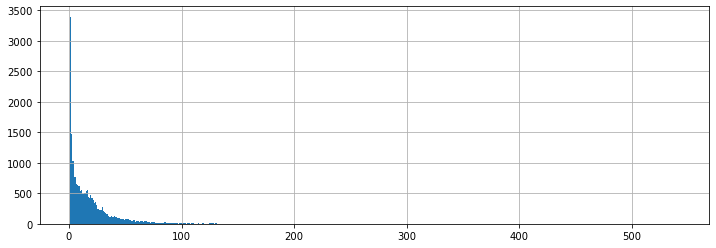

In [74]:
# Per-order stats:

grouped_by_invoiceno = df.groupby("InvoiceNo")

# Number of different products per order (not including quantity)
order_sizes = grouped_by_invoiceno.size()
axes = grouped_by_invoiceno.size().hist(bins=order_sizes.max(), figsize=(12, 4))



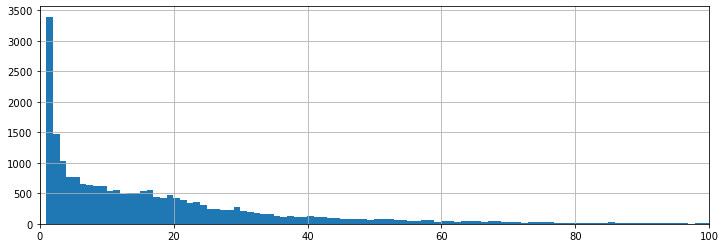

In [75]:
# Interestingly, we have a few orders containing a great number of different products.
axes.set_xlim(0, 100)
# axes.set_ylim(0, 20)
display(axes.figure)

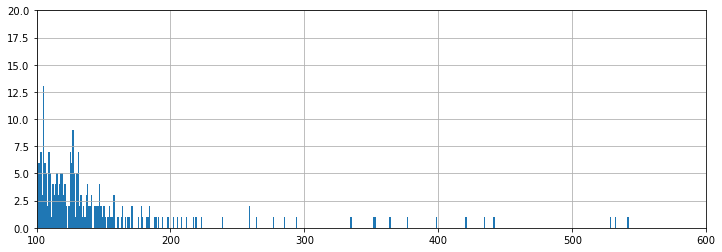

In [76]:
# Interestingly, we have a few orders containing a great number of different products.
axes.set_xlim(100, 600)
axes.set_ylim(0, 20)
display(axes.figure)

In [149]:
# What is the largest order?

print("Number of items in order with most unique items:", grouped_by_invoiceno.size().max())

# invoice_with_most_unique_items = grouped_by_invoiceno.size().argmax()  # This is the row number
invoice_with_most_unique_items = grouped_by_invoiceno.size().idxmax()  # This is the index

print(invoice_with_most_unique_items)

# grouped_by_invoiceno.groups[invoice_with_most_unique_items]
with pd.option_context('display.max_rows', 100):
    # Need to explicitly use df.head(), otherwise Jupyter Notebook is in charge of selecting table size
    display(grouped_by_invoiceno.get_group(invoice_with_most_unique_items).head(20))



# This seems to be an adhoc invoice for some data with no customer ID?


Number of items in order with most unique items: 542
576339


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
466895,576339,10135,COLOURING PENCILS BROWN TUBE,14,11/14/2011 15:27,2.46,14096.0,United Kingdom
466896,576339,15044A,PINK PAPER PARASOL,1,11/14/2011 15:27,5.79,14096.0,United Kingdom
466897,576339,16238,PARTY TIME PENCIL ERASERS,2,11/14/2011 15:27,0.42,14096.0,United Kingdom
466898,576339,16258A,SWIRLY CIRCULAR RUBBERS IN BAG,1,11/14/2011 15:27,0.83,14096.0,United Kingdom
466899,576339,17003,BROCADE RING PURSE,2,11/14/2011 15:27,0.63,14096.0,United Kingdom
466900,576339,20617,FIRST CLASS PASSPORT COVER,1,11/14/2011 15:27,4.13,14096.0,United Kingdom
466901,576339,20652,BLUE POLKADOT LUGGAGE TAG,2,11/14/2011 15:27,2.46,14096.0,United Kingdom
466902,576339,20659,ECONOMY LUGGAGE TAG,3,11/14/2011 15:27,2.46,14096.0,United Kingdom
466903,576339,20675,BLUE POLKADOT BOWL,1,11/14/2011 15:27,2.46,14096.0,United Kingdom
466904,576339,20677,PINK POLKADOT BOWL,2,11/14/2011 15:27,2.46,14096.0,United Kingdom


In [31]:
type(grouped_by_invoiceno)

pandas.core.groupby.generic.DataFrameGroupBy

In [54]:
print("Number of rows with N/A CustomerID:", df['CustomerID'].isna().sum())
df[df['CustomerID'].isna()]

Number of rows with N/A CustomerID: 135080


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [55]:
print("Number of lines with N/A Description:", df['Description'].isna().sum())
df[df['Description'].isna()]['CustomerID'].isna().sum()

Number of rows with N/A Description: 1454


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [58]:
print("Are all lines with N/A Description also with N/A CustomerID?")
df[df['Description'].isna()]['CustomerID'].isna().sum()
print("Yes.")

df[df['Description'].isna()]['CustomerID'].dropna()


Are all lines with N/A Description also with N/A CustomerID?
Yes.


Series([], Name: CustomerID, dtype: float64)

In [78]:
nx.Graph.to_net

In [81]:
import timeit
timeit.timeit?
# timeit.Timer.timeit?

In [84]:
# How does the product codes look?
# "POST" is the most frequent?
# What is that?

with pd.option_context('display.max_rows', 100):
    display(df['StockCode'].sort_values().tail(100))

359060    POST
35210     POST
14166     POST
187040    POST
328456    POST
458361    POST
355258    POST
224212    POST
379306    POST
252782    POST
478503    POST
252771    POST
355287    POST
90262     POST
232016    POST
231974    POST
334725    POST
118768    POST
334746    POST
510256    POST
118481    POST
457150    POST
73621     POST
396479    POST
7290      POST
118496    POST
313049    POST
457140    POST
457182    POST
277171    POST
246297    POST
495884    POST
294212    POST
102387    POST
291334    POST
277204    POST
203774    POST
46882     POST
46880     POST
102738    POST
233092    POST
261831    POST
148141    POST
14254     POST
52430     POST
432303    POST
443206    POST
128891    POST
148257    POST
65955     POST
341204    POST
52368     POST
73740     POST
73659     POST
443119    POST
432330    POST
457126    POST
495928    POST
206079    POST
535003    POST
39000     POST
397515    POST
397549    POST
531431    POST
313193    POST
397621    POST
89254     

In [87]:
# POSTAGE is applied to countries outside of UK:

print(f" - Number of POSTAGE lines:", (df['StockCode'] == "POST").sum())

df_post = df[df['StockCode'] == "POST"]
display(df_post)

df_post['Country'].unique()

 - Number of POSTAGE lines: 1196
 - Number of POSTAGE lines: 1196


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.0,12583.0,France
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.0,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.0,12662.0,Germany
5073,536840,POST,POSTAGE,1,12/2/2010 18:27,18.0,12738.0,Germany
5258,536852,POST,POSTAGE,1,12/3/2010 9:51,18.0,12686.0,France
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,12/9/2011 10:10,15.0,12423.0,Belgium
541216,581494,POST,POSTAGE,2,12/9/2011 10:13,18.0,12518.0,Germany
541730,581570,POST,POSTAGE,1,12/9/2011 11:59,18.0,12662.0,Germany
541767,581574,POST,POSTAGE,2,12/9/2011 12:09,18.0,12526.0,Germany


array(['France', 'Netherlands', 'Germany', 'Switzerland', 'Portugal',
       'Italy', 'Belgium', 'United Kingdom', 'Denmark', 'Spain',
       'Finland', 'Austria', 'Sweden', 'Norway', 'Cyprus', 'Australia',
       'Greece', 'European Community', 'Poland', 'Malta', 'Canada',
       'United Arab Emirates', 'Czech Republic'], dtype=object)

In [88]:
# Lad os se hvad folk i Danmark har købt:
df[df['Country'] == "Denmark"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20017,538003,22847,BREAD BIN DINER STYLE IVORY,8,12/9/2010 12:05,14.95,12429.0,Denmark
20018,538003,22779,WOODEN OWLS LIGHT GARLAND,48,12/9/2010 12:05,3.75,12429.0,Denmark
20019,538003,22331,WOODLAND PARTY BAG + STICKER SET,8,12/9/2010 12:05,1.65,12429.0,Denmark
20020,538003,22365,DOORMAT RESPECTABLE HOUSE,2,12/9/2010 12:05,7.95,12429.0,Denmark
20021,538003,22673,FRENCH GARDEN SIGN BLUE METAL,24,12/9/2010 12:05,1.25,12429.0,Denmark
...,...,...,...,...,...,...,...,...
527390,580716,22631,CIRCUS PARADE LUNCH BOX,12,12/5/2011 16:48,1.95,12367.0,Denmark
527391,580716,22630,DOLLY GIRL LUNCH BOX,12,12/5/2011 16:48,1.95,12367.0,Denmark
527392,580716,22708,WRAP DOLLY GIRL,25,12/5/2011 16:48,0.42,12367.0,Denmark
527393,580716,22045,SPACEBOY GIFT WRAP,25,12/5/2011 16:48,0.42,12367.0,Denmark


In [90]:
# Other weird StockCodes:
# 'BANK CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M', 'PADS'

df[df['StockCode'] == 'C2']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1423,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.0,14911.0,EIRE
12119,537368,C2,CARRIAGE,1,12/6/2010 12:40,50.0,14911.0,EIRE
12452,537378,C2,CARRIAGE,1,12/6/2010 13:06,50.0,14911.0,EIRE
19975,537963,C2,CARRIAGE,1,12/9/2010 11:30,50.0,13369.0,United Kingdom
20016,538002,C2,CARRIAGE,1,12/9/2010 11:48,50.0,14932.0,Channel Islands
...,...,...,...,...,...,...,...,...
513202,579539,C2,CARRIAGE,1,11/30/2011 10:06,50.0,14911.0,EIRE
515000,579768,C2,CARRIAGE,1,11/30/2011 15:08,50.0,14911.0,EIRE
516484,579910,C2,CARRIAGE,1,12/1/2011 8:52,50.0,14911.0,EIRE
518905,580127,C2,CARRIAGE,1,12/1/2011 17:51,50.0,14911.0,EIRE


In [91]:
df[df['StockCode'] == 'CRUK']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
317508,C564763,CRUK,CRUK Commission,-1,8/30/2011 10:49,1.60,14096.0,United Kingdom
324023,C565382,CRUK,CRUK Commission,-1,9/2/2011 15:45,13.01,14096.0,United Kingdom
333779,C566216,CRUK,CRUK Commission,-1,9/9/2011 15:17,15.96,14096.0,United Kingdom
338848,C566565,CRUK,CRUK Commission,-1,9/13/2011 12:32,52.24,14096.0,United Kingdom
351003,C567655,CRUK,CRUK Commission,-1,9/21/2011 14:40,608.66,14096.0,United Kingdom
361603,C568345,CRUK,CRUK Commission,-1,9/26/2011 15:28,447.56,14096.0,United Kingdom
372785,C569245,CRUK,CRUK Commission,-1,10/3/2011 9:57,361.59,14096.0,United Kingdom
390002,C570487,CRUK,CRUK Commission,-1,10/10/2011 17:12,411.92,14096.0,United Kingdom
401767,C571440,CRUK,CRUK Commission,-1,10/17/2011 13:31,495.98,14096.0,United Kingdom
416464,C572551,CRUK,CRUK Commission,-1,10/24/2011 17:07,425.14,14096.0,United Kingdom


In [113]:

df_weird_stockcodes = df[df['StockCode'].isin(['BANK CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M', 'PADS', 'POST'])]

print("Rows with weird stock codes:", len(df_weird_stockcodes))
df_weird_stockcodes

Rows with weird stock codes: 724


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
1423,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.00,14911.0,EIRE
2239,536569,M,Manual,1,12/1/2010 15:35,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,12/1/2010 15:35,18.95,16274.0,United Kingdom
4406,536779,BANK CHARGES,Bank Charges,1,12/2/2010 15:08,15.00,15823.0,United Kingdom
...,...,...,...,...,...,...,...,...
533082,C581009,M,Manual,-1,12/7/2011 9:15,125.00,16971.0,United Kingdom
534008,581127,BANK CHARGES,Bank Charges,1,12/7/2011 12:45,15.00,16271.0,United Kingdom
534308,C581145,M,Manual,-1,12/7/2011 13:48,9.95,17490.0,United Kingdom
538321,581405,M,Manual,3,12/8/2011 13:50,0.42,13521.0,United Kingdom


In [116]:
print(len(df))

len(df[~df['StockCode'].isin(['BANK CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M', 'PADS', 'POST'])])

406829


404909

In [93]:
non_product_stock_codes = ['BANK CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M', 'PADS', 'POST']

for stockcode in non_product_stock_codes:
    display(df[df['StockCode'] == stockcode])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4406,536779,BANK CHARGES,Bank Charges,1,12/2/2010 15:08,15.000,15823.0,United Kingdom
62508,541505,BANK CHARGES,Bank Charges,1,1/18/2011 15:58,15.000,15939.0,United Kingdom
152966,549717,BANK CHARGES,Bank Charges,1,4/11/2011 14:56,15.000,14606.0,United Kingdom
175275,551945,BANK CHARGES,Bank Charges,1,5/5/2011 11:09,15.000,16714.0,United Kingdom
327921,565735,BANK CHARGES,Bank Charges,1,9/6/2011 12:25,15.000,16904.0,United Kingdom
361740,568375,BANK CHARGES,Bank Charges,1,9/26/2011 17:01,15.000,13405.0,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,9/26/2011 17:01,0.001,13405.0,United Kingdom
407618,571900,BANK CHARGES,Bank Charges,1,10/19/2011 14:26,15.000,13263.0,United Kingdom
431351,573586,BANK CHARGES,Bank Charges,1,10/31/2011 14:48,15.000,14704.0,United Kingdom
440745,574546,BANK CHARGES,Bank Charges,1,11/4/2011 14:59,15.000,13651.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1423,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.0,14911.0,EIRE
12119,537368,C2,CARRIAGE,1,12/6/2010 12:40,50.0,14911.0,EIRE
12452,537378,C2,CARRIAGE,1,12/6/2010 13:06,50.0,14911.0,EIRE
19975,537963,C2,CARRIAGE,1,12/9/2010 11:30,50.0,13369.0,United Kingdom
20016,538002,C2,CARRIAGE,1,12/9/2010 11:48,50.0,14932.0,Channel Islands
...,...,...,...,...,...,...,...,...
513202,579539,C2,CARRIAGE,1,11/30/2011 10:06,50.0,14911.0,EIRE
515000,579768,C2,CARRIAGE,1,11/30/2011 15:08,50.0,14911.0,EIRE
516484,579910,C2,CARRIAGE,1,12/1/2011 8:52,50.0,14911.0,EIRE
518905,580127,C2,CARRIAGE,1,12/1/2011 17:51,50.0,14911.0,EIRE


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
317508,C564763,CRUK,CRUK Commission,-1,8/30/2011 10:49,1.60,14096.0,United Kingdom
324023,C565382,CRUK,CRUK Commission,-1,9/2/2011 15:45,13.01,14096.0,United Kingdom
333779,C566216,CRUK,CRUK Commission,-1,9/9/2011 15:17,15.96,14096.0,United Kingdom
338848,C566565,CRUK,CRUK Commission,-1,9/13/2011 12:32,52.24,14096.0,United Kingdom
351003,C567655,CRUK,CRUK Commission,-1,9/21/2011 14:40,608.66,14096.0,United Kingdom
361603,C568345,CRUK,CRUK Commission,-1,9/26/2011 15:28,447.56,14096.0,United Kingdom
372785,C569245,CRUK,CRUK Commission,-1,10/3/2011 9:57,361.59,14096.0,United Kingdom
390002,C570487,CRUK,CRUK Commission,-1,10/10/2011 17:12,411.92,14096.0,United Kingdom
401767,C571440,CRUK,CRUK Commission,-1,10/17/2011 13:31,495.98,14096.0,United Kingdom
416464,C572551,CRUK,CRUK Commission,-1,10/24/2011 17:07,425.14,14096.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1,12/5/2010 13:21,29.29,14527.0,United Kingdom
14498,C537597,D,Discount,-1,12/7/2010 12:34,281.00,15498.0,United Kingdom
19392,C537857,D,Discount,-1,12/8/2010 16:00,267.12,17340.0,United Kingdom
31134,C538897,D,Discount,-1,12/15/2010 9:14,5.76,16422.0,United Kingdom
...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,11/18/2011 12:06,19.82,14527.0,United Kingdom
479869,C577227,D,Discount,-1,11/18/2011 12:06,16.76,14527.0,United Kingdom
493613,C578239,D,Discount,-1,11/23/2011 12:29,26.33,14912.0,Italy
516221,C579884,D,Discount,-1,11/30/2011 17:34,20.53,14527.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
317507,564764,DOT,DOTCOM POSTAGE,1,8/30/2011 10:49,11.17,14096.0,United Kingdom
324002,565383,DOT,DOTCOM POSTAGE,1,9/2/2011 15:45,16.46,14096.0,United Kingdom
333755,566217,DOT,DOTCOM POSTAGE,1,9/9/2011 15:17,13.16,14096.0,United Kingdom
338829,566566,DOT,DOTCOM POSTAGE,1,9/13/2011 12:32,85.58,14096.0,United Kingdom
350599,567656,DOT,DOTCOM POSTAGE,1,9/21/2011 14:40,878.55,14096.0,United Kingdom
361584,568346,DOT,DOTCOM POSTAGE,1,9/26/2011 15:28,688.08,14096.0,United Kingdom
372766,569246,DOT,DOTCOM POSTAGE,1,10/3/2011 9:57,490.25,14096.0,United Kingdom
389983,570488,DOT,DOTCOM POSTAGE,1,10/10/2011 17:12,635.01,14096.0,United Kingdom
401766,571441,DOT,DOTCOM POSTAGE,1,10/17/2011 13:31,743.62,14096.0,United Kingdom
416463,572552,DOT,DOTCOM POSTAGE,1,10/24/2011 17:07,638.30,14096.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,M,Manual,1,12/1/2010 15:35,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,12/1/2010 15:35,18.95,16274.0,United Kingdom
6798,536981,M,Manual,2,12/3/2010 14:26,0.85,14723.0,United Kingdom
7976,537077,M,Manual,12,12/5/2010 11:59,0.42,17062.0,United Kingdom
8530,537137,M,Manual,36,12/5/2010 12:43,0.85,16327.0,United Kingdom
...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,12/6/2011 14:23,1.25,17841.0,United Kingdom
533082,C581009,M,Manual,-1,12/7/2011 9:15,125.00,16971.0,United Kingdom
534308,C581145,M,Manual,-1,12/7/2011 13:48,9.95,17490.0,United Kingdom
538321,581405,M,Manual,3,12/8/2011 13:50,0.42,13521.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,4/15/2011 9:27,0.001,13952.0,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,7/26/2011 10:13,0.001,15618.0,United Kingdom
358655,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,9/25/2011 12:22,0.000,16133.0,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,9/25/2011 14:58,0.001,16198.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.0,12583.0,France
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.0,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.0,12662.0,Germany
5073,536840,POST,POSTAGE,1,12/2/2010 18:27,18.0,12738.0,Germany
5258,536852,POST,POSTAGE,1,12/3/2010 9:51,18.0,12686.0,France
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,12/9/2011 10:10,15.0,12423.0,Belgium
541216,581494,POST,POSTAGE,2,12/9/2011 10:13,18.0,12518.0,Germany
541730,581570,POST,POSTAGE,1,12/9/2011 11:59,18.0,12662.0,Germany
541767,581574,POST,POSTAGE,2,12/9/2011 12:09,18.0,12526.0,Germany


In [97]:
df['StockCode'].unique()

Object `sort` not found.


In [104]:
all_stockcodes = np.sort(df['StockCode'].unique())
print(", ".join(all_stockcodes[-100:]))


90178B, 90179A, 90179C, 90180A, 90180B, 90181A, 90182C, 90183A, 90183C, 90184A, 90184B, 90184C, 90185A, 90185B, 90185C, 90185D, 90186A, 90186B, 90187B, 90188, 90189A, 90190A, 90190B, 90190C, 90191, 90192, 90194, 90195A, 90195B, 90196A, 90196B, 90197B, 90198A, 90198B, 90199A, 90199B, 90199C, 90199D, 90200A, 90200B, 90200C, 90200D, 90200E, 90201A, 90201B, 90201C, 90201D, 90202A, 90202B, 90202C, 90202D, 90204, 90205A, 90205C, 90206A, 90206C, 90208, 90209A, 90209B, 90209C, 90210A, 90210B, 90210C, 90210D, 90211A, 90211B, 90212B, 90212C, 90214A, 90214B, 90214C, 90214D, 90214E, 90214F, 90214G, 90214H, 90214I, 90214J, 90214K, 90214L, 90214M, 90214N, 90214O, 90214P, 90214R, 90214S, 90214T, 90214U, 90214V, 90214W, 90214Y, 90214Z, BANK CHARGES, C2, CRUK, D, DOT, M, PADS, POST


In [105]:
df.sort_values('StockCode').tail(20)
df_pr

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
88912,543822,POST,POSTAGE,3,2/14/2011 9:24,28.0,12507.0,Spain
253798,559173,POST,POSTAGE,2,7/7/2011 10:03,28.0,12540.0,Spain
397021,571111,POST,POSTAGE,1,10/13/2011 16:37,15.0,14976.0,United Kingdom
246364,558699,POST,POSTAGE,1,7/1/2011 12:17,18.0,12494.0,France
148644,549249,POST,POSTAGE,2,4/7/2011 12:04,15.0,12423.0,Belgium
332800,566115,POST,POSTAGE,1,9/9/2011 10:51,18.0,12674.0,France
186082,552845,POST,POSTAGE,6,5/11/2011 14:37,15.0,14646.0,Netherlands
497180,578348,POST,POSTAGE,2,11/24/2011 9:34,18.0,12494.0,France
186084,552846,POST,POSTAGE,1,5/11/2011 14:38,18.0,14646.0,Netherlands
457789,575747,POST,POSTAGE,3,11/11/2011 10:19,18.0,12589.0,France


In [124]:
products_by_orders_count = df.groupby('StockCode')['InvoiceNo'].count().sort_values(ascending=False)
products_by_orders_count

StockCode
85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
          ... 
21310        1
90125E       1
90128B       1
37379A       1
84743C       1
Name: InvoiceNo, Length: 3684, dtype: int64

In [178]:
# Først, lav en tabel med alle produkter.
sales_df = df
products_df = sales_df.groupby('StockCode').first()
del products_df['InvoiceNo']
del products_df['Quantity']
del products_df['CustomerID']
del products_df['Country']

# Beregn product order count:
# product_orders_count = df.groupby('StockCode')['InvoiceNo'].count().sort_values(ascending=False)
products_df['OrdersCount'] = sales_df.groupby('StockCode')['InvoiceNo'].count()

products_df_sorted = products_df.sort_values(by='OrdersCount', ascending=False)

products_df_sorted.tail(20)

,Description,InvoiceDate,UnitPrice,OrdersCount
StockCode,,,,
20667,CHERRY BLOSSOM PURSE,5/31/2011 11:39,2.95,1
20678,LARGE BLACK DIAMANTE HAIRSLIDE,9/23/2011 14:49,1.65,1
84877A,PINK ROUND COMPACT MIRROR,4/6/2011 12:49,1.25,1
90125E,AMBER BERTIE GLASS BEAD BAG CHARM,5/26/2011 14:09,2.10,1
90128B,BLUE LEAVES AND BEADS PHONE CHARM,12/3/2010 14:54,1.25,1
84856S,SMALL TAHITI BEACH BAG,4/14/2011 10:29,3.81,1
84854,GIRLY PINK TOOL SET,12/1/2010 9:41,4.95,1
90129E,PURPLE GLASS TASSLE BAG CHARM,10/5/2011 11:57,2.95,1
90130A,WHITE STONE/CRYSTAL EARRINGS,11/24/2011 14:40,2.95,1


In [111]:
sales_df.groupby('StockCode').first().sort_values(by='StockCode').tail(20)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
StockCode,,,,,,,
90214M,536591,"LETTER ""M"" BLING KEY RING",1,12/1/2010 16:57,1.250,14606.0,United Kingdom
90214N,556202,"LETTER ""N"" BLING KEY RING",2,6/9/2011 13:08,1.250,14606.0,United Kingdom
90214O,580691,"LETTER ""O"" BLING KEY RING",12,12/5/2011 15:48,0.290,13790.0,United Kingdom
90214P,545838,"LETTER ""P"" BLING KEY RING",1,3/7/2011 13:33,1.250,14606.0,United Kingdom
90214R,541595,"LETTER ""R"" BLING KEY RING",1,1/19/2011 16:08,1.250,14606.0,United Kingdom
90214S,536591,"LETTER ""S"" BLING KEY RING",1,12/1/2010 16:57,1.250,14606.0,United Kingdom
90214T,580691,"LETTER ""T"" BLING KEY RING",12,12/5/2011 15:48,0.290,13790.0,United Kingdom
90214U,580691,"LETTER ""U"" BLING KEY RING",12,12/5/2011 15:48,0.290,13790.0,United Kingdom
90214V,536591,"LETTER ""V"" BLING KEY RING",1,12/1/2010 16:57,1.250,14606.0,United Kingdom


In [119]:
products_df_sorted.index.array
dir(products_df_sorted.index)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__inv__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_accessors',
 '_arith_method',
 '_assert_can_do_setop',

In [123]:
type(products_df_sorted.index[0])

str

In [ ]:
products_df_sorted.at[]

In [125]:
[att for att in dir(pd.Series) if 'sort' in att]

['argsort', 'searchsorted', 'sort_index', 'sort_values']

In [134]:
df.groupby("InvoiceNo").size().value_counts().sort_index().head(20)


1     3395
2     1473
3     1029
4      775
5      763
6      651
7      630
8      614
9      613
10     538
11     559
12     492
13     507
14     509
15     542
16     561
17     447
18     427
19     475
20     430
dtype: int64

<AxesSubplot:>

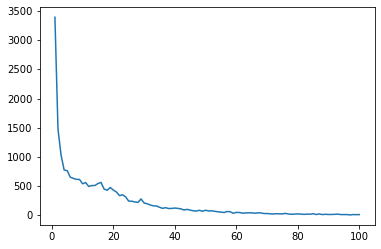

In [135]:
df.groupby("InvoiceNo").size().value_counts().sort_index()[0:100].plot.line()

In [136]:
len(df.groupby("InvoiceNo"))

22190

In [ ]:
# Build same-order undirected graph:
# dict[StockCode1][StockCode2] = count

grouped_by_invoiceno = df.groupby("InvoiceNo")

# print("Total orders (invoices):", grouped_by_invoiceno.ngroups)
print("Dataset:")
print(f"- {len(df)} rows,")
print(f"- {df.groupby('InvoiceNo').ngroups} orders/invoices,")
print(f"- {len(df['StockCode'].unique())} unique StockCodes.")

def build_sameorder_product_dod_using_cartesian_forloop(df):
    # We use a double default-dict, but since most StockCodes are present, 
    # it is probably faster to pre-populate the outer dict with *all* StockCodes.
    # Also, we only have 3684, so it would be possible to use an adjacency matrix, 
    # instead of adjacency list - only about 10M values so about 40-80 MB. 
    
    sameorder_dod = defaultdict(lambda: defaultdict(int))
    for invoiceno, order_df in df.groupby("InvoiceNo"):
        # Can use either itertools.product or itertools.combinations:
        # itertools.combinations only gives unique combinations, but can do more than two.
        for stock_code1, stock_code2 in itertools.product(order_df['StockCode'], repeat=2):
            if stock_code1 == stock_code2:
                continue
            sameorder_dod[stock_code1][stock_code2] += 1
    return sameorder_dod


# Let's measure performance of using 
# for-loop over product(order_df['StockCode'], order_df['StockCode']), for each order, grouped by InvoiceNo:
# Time to compute:
ttc = timeit.timeit(
    'global sameorder_g_dod; '
    'sameorder_g_dod = build_sameorder_product_dod_using_cartesian_forloop(df)', 
    globals=locals(), 
    number=1
)

print(f"\nTime to compute same-order dict-of-dict, "
      f"using for-loop on cartesian product of StockCodes in each order: {ttc:.01f} sec")
print(" - single-threaded and inefficient for-loop.")
print(" - number of nodes:", len(sameorder_g_dod), "(single-product orders do not contribute to same-order graph)")
# sameorder_g_dod = build_sameorder_product_dod(df)


In [139]:
weights = [1, 3, 8, 4, 5, 0.5]
weights = np.array(weights)
sidxs = np.argsort(weights)
weights[np.argsort(weights)]

array([0.5, 1. , 3. , 4. , 5. , 8. ])

In [199]:
# What were the rows with N/A CustomerID

df_raw[df_raw['CustomerID'].isna()]

# row 622 / line 624: Empty string.
# 536414,22139,,56,12/1/2010 11:52,0,,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [152]:
timeit.default_timer()

100218.4286967

In [207]:

df[(df['CustomerID'] == '12583')]
df[(df['CustomerID'] == '12583') & (df['StockCode'] == '142')]

# Index is original df row index

df.loc[31]
df.loc[142]

InvoiceNo                           536382
StockCode                            10002
Description    INFLATABLE POLITICAL GLOBE 
Quantity                                12
InvoiceDate                 12/1/2010 9:45
UnitPrice                             0.85
CustomerID                           16098
Country                     United Kingdom
Name: 142, dtype: object

In [212]:
with pd.option_context('display.max_rows', 100):
    display(df[df['StockCode'] == '10002'].head(50))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/2010 8:45,0.85,12583,France
142,536382,10002,INFLATABLE POLITICAL GLOBE,12,12/1/2010 9:45,0.85,16098,United Kingdom
5466,536863,10002,INFLATABLE POLITICAL GLOBE,1,12/3/2010 11:19,0.85,17967,United Kingdom
7598,537047,10002,INFLATABLE POLITICAL GLOBE,1,12/5/2010 11:02,0.85,13069,United Kingdom
10168,537227,10002,INFLATABLE POLITICAL GLOBE,24,12/6/2010 8:42,0.85,17677,United Kingdom
17604,537770,10002,INFLATABLE POLITICAL GLOBE,12,12/8/2010 12:24,0.85,15529,United Kingdom
20617,538069,10002,INFLATABLE POLITICAL GLOBE,8,12/9/2010 14:08,0.85,16795,United Kingdom
21507,538086,10002,INFLATABLE POLITICAL GLOBE,10,12/9/2010 14:44,0.85,12872,United Kingdom
21551,538093,10002,INFLATABLE POLITICAL GLOBE,12,12/9/2010 14:49,0.85,12682,France
22380,538167,10002,INFLATABLE POLITICAL GLOBE,12,12/9/2010 18:58,0.85,14713,United Kingdom


In [226]:
# with pd.option_context('display.max_rows', 100):
#     next(iter(df.groupby('StockCode')['CustomerID']))[1].head(50)

code, gs = next(iter(df.groupby('StockCode')['CustomerID']))
print(f"CustomerIDs for StockCode {code!r}:")
print(f"{gs.unique()=}")
print(f"{len(gs)=}")
print(f"{len(gs.unique())=}")
print(f"{gs.nunique()=}")
print(f"{gs.size=}")

display(gs.head(50))

gs.value_counts()

CustomerIDs for StockCode '10002':
gs.unique()=array(['12583', '16098', '17967', '13069', '17677', '15529', '16795',
       '12872', '12682', '14713', '12731', '14911', '16701', '16805',
       '12867', '14258', '16122', '17365', '13246', '12748', '18069',
       '12673', '12510', '12451', '16395', '12637', '13230', '17236',
       '13148', '12681', '12754', '17085', '15382', '17994', '13870',
       '15514', '14769', '17337', '18079', '14525'], dtype=object)
len(gs)=49
len(gs.unique())=40
gs.nunique()=40
gs.size=49


31        12583
142       16098
5466      17967
7598      13069
10168     17677
17604     15529
20617     16795
21507     12872
21551     12682
22380     14713
23275     12731
23896     14911
27982     16701
30249     16805
31046     12867
34176     14713
44809     12682
45692     14258
52333     16122
52498     17365
56225     13246
58503     12748
58741     18069
59184     12673
61929     12510
63082     12451
64438     16395
64502     12637
65899     14713
68014     13230
70701     17236
75792     13148
76571     12731
77513     12681
81833     12754
88536     17085
93152     15382
97459     17994
101883    13870
109443    15514
121872    14713
126025    14769
127450    12867
133153    15529
142354    12731
143465    17085
143930    17337
158070    18079
160128    14525
Name: CustomerID, dtype: object

14713    4
12731    3
15529    2
17085    2
12682    2
12867    2
17236    1
16395    1
12583    1
16122    1
12673    1
16098    1
16701    1
15514    1
12748    1
13230    1
14769    1
15382    1
17365    1
12754    1
12637    1
13870    1
12681    1
18079    1
18069    1
16795    1
17677    1
12510    1
17337    1
17967    1
13246    1
12872    1
14911    1
14525    1
13148    1
13069    1
14258    1
17994    1
12451    1
16805    1
Name: CustomerID, dtype: int64

In [191]:
pandas.core.groupby.generic.SeriesGroupBy.unique?

Object `pandas.core.groupby.generic.SeriesGroupBy.unique` not found.


In [229]:
# Beregn product order count:
# product_orders_count = df.groupby('StockCode')['InvoiceNo'].count().sort_values(ascending=False)
product_orders_count = df.groupby('StockCode')['InvoiceNo'].count()
products_df['OrdersCount'] = product_orders_count

# Beregn hvor mange brugere har købt hvert enkelt produkt:
product_users_count = df.groupby(by='StockCode')['CustomerID'].nunique()
# product_users_count = df.groupby(by='StockCode')['CustomerID'].value_counts()
display(product_users_count)

products_df['UsersCount'] = product_users_count


# for code, gdf in df.groupby('StockCode')['CustomerID']:
#     print(len(gdf))
#     print(len(gdf.unique()))
#     print(gdf.nunique())
#     display(gdf)
#     break
display(products_df)

StockCode
10002     40
10080     19
10120     25
10123C     3
10124A     5
          ..
90214U     1
90214V     2
90214W     1
90214Y     3
90214Z     1
Name: CustomerID, Length: 3676, dtype: int64

,Description,InvoiceDate,UnitPrice,OrdersCount,UsersCount
StockCode,,,,,
10002,INFLATABLE POLITICAL GLOBE,12/1/2010 8:45,0.85,49,40
10080,GROOVY CACTUS INFLATABLE,2/27/2011 13:47,0.85,21,19
10120,DOGGY RUBBER,12/3/2010 11:19,0.21,30,25
10123C,HEARTS WRAPPING TAPE,12/3/2010 11:19,0.65,3,3
10124A,SPOTS ON RED BOOKCOVER TAPE,12/6/2010 13:13,0.42,5,5
...,...,...,...,...,...
90214U,"LETTER ""U"" BLING KEY RING",12/5/2011 15:48,0.29,1,1
90214V,"LETTER ""V"" BLING KEY RING",12/1/2010 16:57,1.25,3,2
90214W,"LETTER ""W"" BLING KEY RING",12/5/2011 15:48,0.29,1,1


In [181]:
# Forskel: Antal brugere vs antal orders:
products_df['OrdersCount'] - products_df['UsersCount']
(products_df['OrdersCount'] - products_df['UsersCount']).max()
# Uh, det lader til at ingen kunder har købt den samme ting to gange??


0

In [165]:
# Alternativ beregning, tjek om der er nogen brugere som har købt det samme produkt flere gange:
users_product_count = df.groupby('CustomerID')['StockCode'].count().sort_values(ascending=False)
users_product_count.head(20)

CustomerID
17841    7971
14911    5813
14096    5095
12748    4623
14606    2778
15311    2491
14646    2066
13089    1857
13263    1672
14298    1640
15039    1508
14156    1406
18118    1283
14159    1211
14796    1164
15005    1159
16033    1152
14056    1127
14769    1093
17511    1074
Name: StockCode, dtype: int64

In [166]:
df[df['CustomerID'] == '17841'].sort_values('StockCode')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
288433,562161,15039,SANDALWOOD FAN,2,8/3/2011 11:58,0.85,17841,United Kingdom
440832,574547,15044A,PINK PAPER PARASOL,1,11/4/2011 15:08,2.95,17841,United Kingdom
348840,567473,15044A,PINK PAPER PARASOL,1,9/20/2011 12:50,2.95,17841,United Kingdom
196729,553860,15044A,PINK PAPER PARASOL,1,5/19/2011 13:57,2.95,17841,United Kingdom
80300,543033,15044A,PINK PAPER PARASOL,1,2/2/2011 15:48,2.95,17841,United Kingdom
...,...,...,...,...,...,...,...,...
146690,549014,85208,SET/12 FUNKY FELT FLOWER PEG IN BAG,1,4/5/2011 15:00,2.10,17841,United Kingdom
159769,550359,85208,SET/12 FUNKY FELT FLOWER PEG IN BAG,2,4/18/2011 10:41,2.10,17841,United Kingdom
2070,536557,85232B,SET OF 3 BABUSHKA STACKING TINS,1,12/1/2010 14:41,4.95,17841,United Kingdom
2085,536557,85232B,SET OF 3 BABUSHKA STACKING TINS,1,12/1/2010 14:41,4.95,17841,United Kingdom


In [167]:
df[df['CustomerID'] == '17841'].sort_values('StockCode')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
288433,562161,15039,SANDALWOOD FAN,2,8/3/2011 11:58,0.85,17841,United Kingdom
440832,574547,15044A,PINK PAPER PARASOL,1,11/4/2011 15:08,2.95,17841,United Kingdom
348840,567473,15044A,PINK PAPER PARASOL,1,9/20/2011 12:50,2.95,17841,United Kingdom
196729,553860,15044A,PINK PAPER PARASOL,1,5/19/2011 13:57,2.95,17841,United Kingdom
80300,543033,15044A,PINK PAPER PARASOL,1,2/2/2011 15:48,2.95,17841,United Kingdom
...,...,...,...,...,...,...,...,...
146690,549014,85208,SET/12 FUNKY FELT FLOWER PEG IN BAG,1,4/5/2011 15:00,2.10,17841,United Kingdom
159769,550359,85208,SET/12 FUNKY FELT FLOWER PEG IN BAG,2,4/18/2011 10:41,2.10,17841,United Kingdom
2070,536557,85232B,SET OF 3 BABUSHKA STACKING TINS,1,12/1/2010 14:41,4.95,17841,United Kingdom
2085,536557,85232B,SET OF 3 BABUSHKA STACKING TINS,1,12/1/2010 14:41,4.95,17841,United Kingdom


In [168]:
df[df['StockCode'] == '15044A'].sort_values('CustomerID')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
156396,550137,15044A,PINK PAPER PARASOL,6,4/14/2011 13:59,2.95,12477,Germany
475690,576910,15044A,PINK PAPER PARASOL,6,11/17/2011 9:51,2.95,12477,Germany
319463,564856,15044A,PINK PAPER PARASOL,6,8/31/2011 9:11,2.95,12477,Germany
220071,556114,15044A,PINK PAPER PARASOL,6,6/9/2011 9:36,2.95,12569,Germany
175165,551886,15044A,PINK PAPER PARASOL,6,5/5/2011 9:23,2.95,12569,Germany
...,...,...,...,...,...,...,...,...
196729,553860,15044A,PINK PAPER PARASOL,1,5/19/2011 13:57,2.95,17841,United Kingdom
348840,567473,15044A,PINK PAPER PARASOL,1,9/20/2011 12:50,2.95,17841,United Kingdom
80300,543033,15044A,PINK PAPER PARASOL,1,2/2/2011 15:48,2.95,17841,United Kingdom
153768,549813,15044A,PINK PAPER PARASOL,2,4/12/2011 12:16,2.95,17972,United Kingdom


In [172]:
df_15044A_sby_customer = df[df['StockCode'] == '15044A'].sort_values('CustomerID')
print("Antal salg af StockCode '15044A':", len(df_15044A_sby_customer))
print("Antal unikke kunder for '15044A':", df_15044A_sby_customer['CustomerID'].nunique())

display(df_15044A_sby_customer.head())

display(df_15044A_sby_customer.groupby('CustomerID').count())
display(df_15044A_sby_customer.groupby('CustomerID')['InvoiceNo'].count())
display(df_15044A_sby_customer.groupby('CustomerID').size())


# Konklusion: Der er helt sikker kunder der har købt det samme produkt flere gange.

Antal salg af StockCode '15044A': 80
Antal unikke kunder for '15044A': 53


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
156396,550137,15044A,PINK PAPER PARASOL,6,4/14/2011 13:59,2.95,12477,Germany
475690,576910,15044A,PINK PAPER PARASOL,6,11/17/2011 9:51,2.95,12477,Germany
319463,564856,15044A,PINK PAPER PARASOL,6,8/31/2011 9:11,2.95,12477,Germany
220071,556114,15044A,PINK PAPER PARASOL,6,6/9/2011 9:36,2.95,12569,Germany
175165,551886,15044A,PINK PAPER PARASOL,6,5/5/2011 9:23,2.95,12569,Germany


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,
12477,3,3,3,3,3,3,3
12569,2,2,2,2,2,2,2
12877,4,4,4,4,4,4,4
12971,2,2,2,2,2,2,2
13012,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
17673,1,1,1,1,1,1,1
17706,1,1,1,1,1,1,1
17841,4,4,4,4,4,4,4


CustomerID
12477    3
12569    2
12877    4
12971    2
13012    1
        ..
17673    1
17706    1
17841    4
17972    1
18236    1
Name: InvoiceNo, Length: 53, dtype: int64

CustomerID
12477    3
12569    2
12877    4
12971    2
13012    1
        ..
17673    1
17706    1
17841    4
17972    1
18236    1
Length: 53, dtype: int64